# Green Bank 2018 Instructions 

###### Chelsey McMichael

# Getting Started

In [80]:
#import needed modules - add any additional modules here (or as needed in code)
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [81]:
#Read in the data to be used. Filenames should be changed to *your* filenames
#The APPSS data is a .csv created from exporting from Google Sheet
data_appss=ascii.read("slice_35_radec.txt")  #APPSS data 
data_alf=ascii.read("alf_data.csv")    #ALFALFA data
data_agc=ascii.read("AGC_CAT.csv") # AGC catalog from UAT Page 

# Generating Right Ascension and Declination

In [82]:
#Here we are creating RA and DEC values for each entry in the APPSS data
#You can skip this if you already have the RA/DEC values for the APPSS sources (but check for dependencies)

str_src_name=data_appss[1][:] #srcname columm, [1] shows what column we are pulling data from 

ra_hrdeg = list(str_src_name)   #these six lines convert these values into a list
ra_mindeg = list(str_src_name)
ra_secdeg = list(str_src_name)
dec_degdeg = list(str_src_name)
dec_mindeg = list(str_src_name)
dec_secdeg = list(str_src_name)

#for loop to convert the RA and DEC strings from csv into float RA/DEC (in decimal degrees)
for i in range(len(ra_hrdeg)):

    #convert RA to decimal degrees
    ra_hrdeg[i] = float(str_src_name[i][1:3])*15. #take portion of name that contains hr.
    ra_mindeg[i] = float(str_src_name[i][3:5])*15./60. #take portion that contains min.
    ra_secdeg[i] = float(str_src_name[i][5:9])*15./3600. #take portion that contains sec.
    #convert DEC to decimal degrees 
    dec_degdeg[i] = float(str_src_name[i][10:12]) #take portion that contains deg.
    dec_mindeg[i] = float(str_src_name[i][12:14])/60. #take portion that contains amin.
    dec_secdeg[i] = float(str_src_name[i][14:])/3600. #take portion that contains asec.
    
ra_deg=np.add(np.add(ra_hrdeg,ra_mindeg),ra_secdeg) #add each contribution to get RA in deg.
dec_deg=np.add(np.add(dec_degdeg, dec_mindeg), dec_secdeg) #add each contribution to get DEC in deg.

for i in range(len(ra_deg)): #keep it in this range where the RA is positive and negative
    if ra_deg[i] > 180.:
        ra_deg[i] = ra_deg[i]-360. 
        
#now that it is converted into decimal degrees, we can use it to make different graphs 

#now that we have RA and DEC in decimal degrees, we can add the columns to our table 
data_appss['RA']=ra_deg
data_appss['DEC']=dec_deg
#if we want, we can save the table (with the new RA/DEC values), so that we don't have 
# to run this portion of the notebook again. Just uncomment the ascii.write() line and
# run. In future usage of the notebook, just load the new table in cell above and skip 
# this cell!
ascii.write(data_appss, 'filename.txt')

# UAT APPSS Slice Detections and Nondetections

In [83]:
vsys_appss=data_appss['Vsys'] #create a new variable for the velocity data from the slice
ra_appss = data_appss['RA']
dec_appss = data_appss['DEC']

#These 'good' values are defined as having systemic velocities greater than 0 km/s (0 km/s is nondetection)
vsys_appss_det= vsys_appss[(vsys_appss > 0)]
ra_appss_det = ra_appss[(vsys_appss > 0)]
dec_appss_det = dec_appss[(vsys_appss > 0)]
ra_appss_nd = ra_appss[(vsys_appss == 0)]
dec_appss_nd = dec_appss[(vsys_appss == 0)]

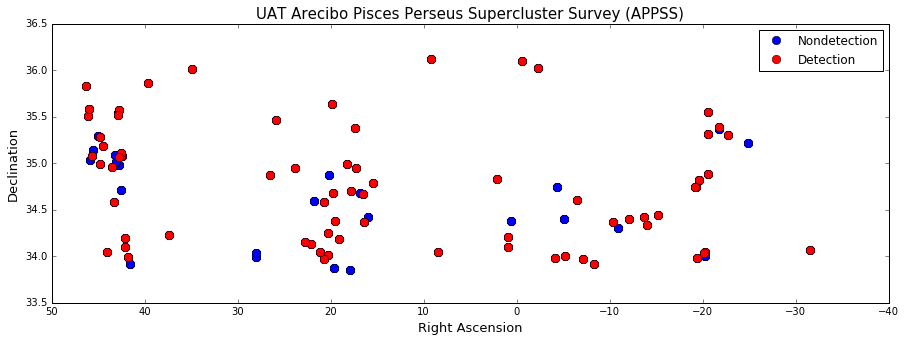

In [84]:
#plots the detections vs. nondetections of your slice as a scatter plot
plt.figure(figsize=(15,5)) #this figsize gives the traditional RA vs DEC dimensions of a graph
plt.gca().invert_xaxis()  #flip x axis 
plt.plot(ra_appss_nd,dec_appss_nd,'bo', markersize=8.5, label = 'Nondetection') #list x, y variables, blue cirlces are nondetections
plt.plot(ra_appss_det,dec_appss_det,'ro',markersize=8.5, label = 'Detection') #red circles define detection, markersize makes the dots larger
plt.title("UAT Arecibo Pisces Perseus Supercluster Survey (APPSS)", fontsize= 15) #title and font size
plt.xlabel("Right Ascension", fontsize=13) #label x axis
plt.ylabel("Declination", fontsize=13)   #label y axis
plt.legend(loc = 1, numpoints = 1) #location of legend 

fig = plt.gcf() #define the figure so that you can save it 

#fig.savefig('just_appss.pdf') #uncomment this so that you can have it save 

# Systemic Velocity of APPSS Detections

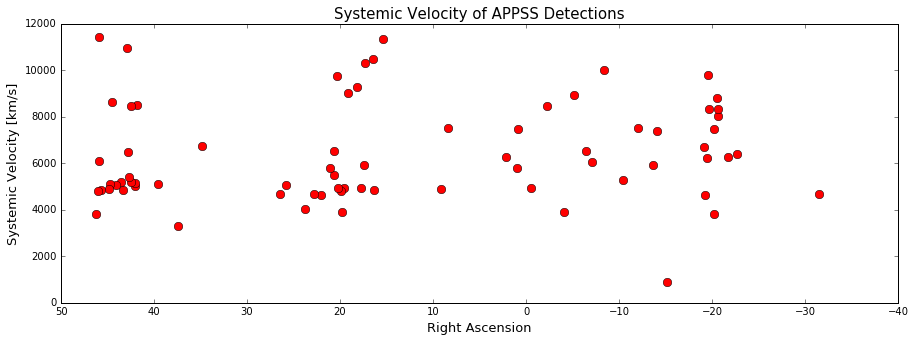

In [85]:
#plots the nonzero velocities of your slice vs the right ascension as a scatter plot for figure 2
plt.figure(figsize=(15,5))
plt.gca().invert_xaxis()
plt.plot(ra_appss_det,vsys_appss_det,'ro', markersize= 8.5) #these are all detections and their calculated systemic velocity
plt.title("Systemic Velocity of APPSS Detections", fontsize= 15)
plt.xlabel("Right Ascension", fontsize=13)
plt.ylabel("Systemic Velocity [km/s]", fontsize=13)

fig = plt.gcf()
#fig.savefig('RA_vs_Vsys.pdf') #uncomment this so that you can have it save 

# Comparing Slice Detections to Multiple Catalogs

In [86]:
#read in the alfalfa data
RA_alf=data_alf["wrapradeg"] 
Dec_alf=data_alf["usedecdeg"]
gooddec_alf=(Dec_alf >= 33.5) & (Dec_alf <= 36.5)

#make sure to pull data that corresponds to your slice range!
#you can always change these values to make it correspond to your slice
#ALFALFA catalog consists of a wide range of declinations 
dec_alf_s35 = Dec_alf[gooddec_alf] 
ra_alf_s35 = RA_alf[gooddec_alf]

#read in the AGC catalog RA and DEC
RA_agc=data_agc["rawrap"] 
Dec_agc=data_agc["decdeg"]
gooddec_agc = (Dec_agc >= 33.5) & (Dec_agc <= 36.5)

#read in the AGC values in your correct declination range
dec_agc_s35 = Dec_agc[gooddec_agc] 
ra_agc_s35 = RA_agc[gooddec_agc]

#print(goodHI)

#read in the velocity data from ALFALFA
v_alf = data_alf['Vhelio']

#make sure the velocity used is only for the range of you slice, so you aren't overloaded w/ data you don't need
v_alf_s35 = v_alf[gooddec_alf]

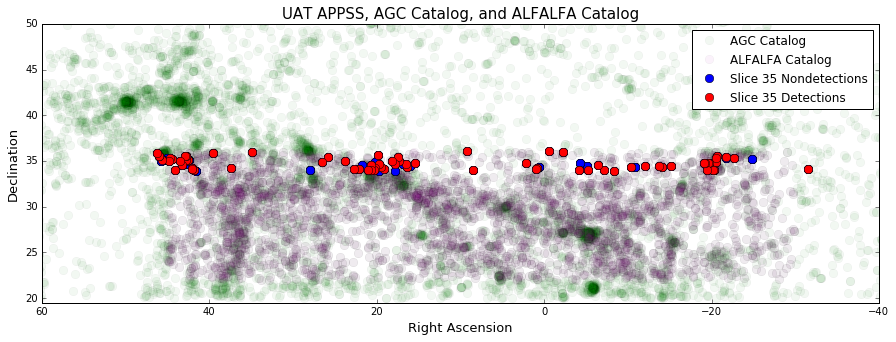

In [87]:
#plots the RA and DEC of ALFALFA and AGC compared to the RA and DEC of your slice
plt.figure(figsize=(15,5))
plt.gca().invert_xaxis()
plt.plot(RA_agc, Dec_agc, 'go',markersize = 8.5, alpha =.05, label = 'AGC Catalog') #alpha changes transparency of each point 
plt.plot(RA_alf, Dec_alf, 'mo',markersize = 8.5, alpha =.05, label ='ALFALFA Catalog')
plt.plot(ra_appss_nd,dec_appss_nd,'bo', markersize=8.5, label = 'Slice 35 Nondetections') #blue circles consist of nondetections
plt.plot(ra_appss_det,dec_appss_det,'ro', markersize = 8.5, label = 'Slice 35 Detections') #red circles define detection

plt.title("UAT APPSS, AGC Catalog, and ALFALFA Catalog", fontsize= 15)
plt.xlabel("Right Ascension", fontsize=13)
plt.ylabel("Declination", fontsize=13)
plt.axis([60, -40, 19.5, 50])
plt.legend(loc = 1, numpoints = 1) #location of legend 

fig = plt.gcf()

#fig.savefig('APPSS_AGC.pdf')  #uncomment this so that you can have it save 

# Comparing the Systemic Velocity of APPSS and ALFALFA Detections

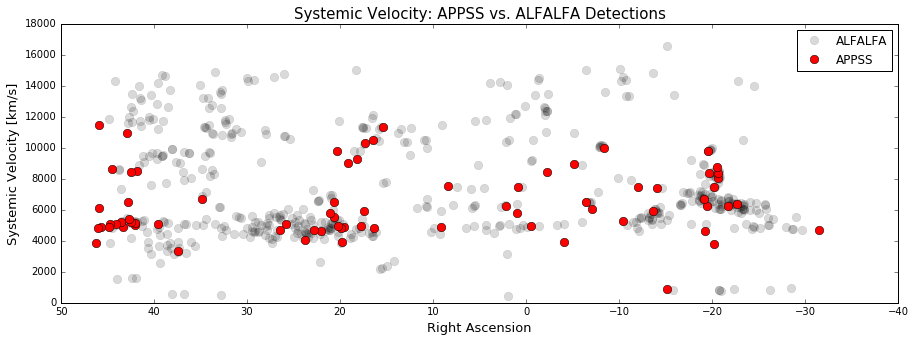

In [88]:
#takes the RA of both the ALFALFA and APPSS, against the relevant velocity data of both
plt.figure(figsize=(15,5))
plt.gca().invert_xaxis()
plt.plot(ra_alf_s35,v_alf_s35,'ko', alpha=.15, markersize= 8.5, label = 'ALFALFA' ) #alpha allows you to make the ALFALFA points transparent
plt.plot(ra_appss_det,vsys_appss_det,'ro', markersize= 8.5, label = 'APPSS') 
plt.title("Systemic Velocity: APPSS vs. ALFALFA Detections", fontsize= 15)
plt.xlabel("Right Ascension", fontsize=13)
plt.ylabel("Systemic Velocity [km/s]", fontsize=13)
plt.legend(loc = 1, numpoints = 1) #location of legend 




fig = plt.gcf()  

#fig.savefig('APPSS_ALFALFA_vsys.pdf') #uncomment this so that you can have it save 

# Counting Detections and Nondetections

In [89]:
#this is just something you might want, it will tell how many detections/nondetections you have
detnon = data_appss['d/n'] #detection or nondetection data pulled
d=detnon[np.where(detnon == 'd')] #detections in csv were defined with 'd'
n=detnon[np.where(detnon == 'n')] #nondetections in csv were defined with 'n'

print('Detections:')
print np.size(d)

print('Nondetections:')
print np.size(n)

Detections:
83
Nondetections:
309


# Finding Certain Values

In [90]:
#In case you want to make cuts on other attributes, such as S/N:
#where is the signal to noise ratio greater than 2?
s_n = data_appss['SN']
goodsn=s_n[np.where(s_n > 2.)]
np.size(goodsn)

62

# Flux vs. Systemic Velocity of Your Slice and the ALFALFA Catalog

In [91]:
#my slice flux and velocity
#notice how I redefined the velocity
flux_appss=data_appss['Flux']

#alfalfa data
flux_alf=data_alf['HIflux']
flux_alf_s35 = flux_alf[gooddec_alf]

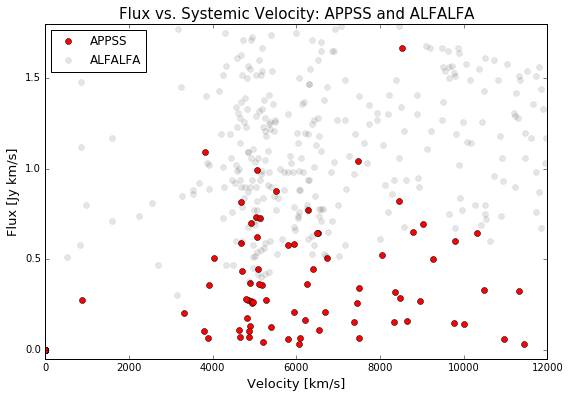

In [92]:
#figure of the velocity vs. flux of the appss slice and the alfalfa data
plt.figure()
plt.figure(figsize=(9,6))
plt.plot(vsys_appss, flux_appss,'ro', label = 'APPSS')
plt.plot(v_alf_s35, flux_alf_s35,'ko', alpha=.1, label = 'ALFALFA') #only near dec 35, +/- 1.5 degrees
plt.title('Flux vs. Systemic Velocity: APPSS and ALFALFA',fontsize=15)
plt.xlabel('Velocity [km/s]',fontsize=13)
plt.ylabel('Flux [Jy km/s]',fontsize=13)
plt.axis([0, 12000, -.05, 1.8])
plt.legend(loc = 2, numpoints = 1) #location of legend 



fig = plt.gcf()

#fig.savefig('flux_velocity_both.pdf') #uncomment to save a pdf

# HI Mass Calculations (Assuming Systemic Velocity and Hubble Velocity are Equal)

In [93]:
#This isn't the correct way to find the HI mass, but it is useful!
#First, you need to find the distance in Mpc to find HI mass
H_0=70 #km/s/Mpc
D_appss=(vsys_appss_det)/(H_0) #km

#make sure the values for flux are for velocities greater than zero, because the good_v_sys is greater than zero
flux_appss_det= flux_appss[(vsys_appss > 0)]

# Calculate HI mass of slice
M_HI_appss = (2.36*10**5)*(D_appss**2)*(flux_appss_det)

#import distance from ALFALFA csv
D_alf=data_alf['Dist']

#Calculate HI mass of ALFALFA catalog
M_HI_alf = (2.36*10**5)*(D_alf**2)*(flux_alf)

# HI Mass vs. Distance Graph

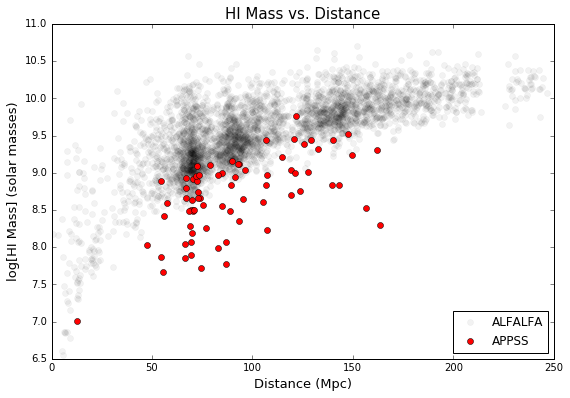

In [94]:
#HI mass vs. distance 
plt.figure()
plt.figure(figsize=(9,6))
plt.plot(D_alf, np.log10(M_HI_alf), 'ko', alpha=.05, label = 'ALFALFA')
plt.plot(D_appss,np.log10(M_HI_appss),'ro', label = 'APPSS')
plt.title("HI Mass vs. Distance",fontsize=15)
plt.xlabel('Distance (Mpc)',fontsize=13)
plt.ylabel('log[HI Mass] (solar masses)',fontsize=13)
plt.legend(loc = 4, numpoints = 1) #location of legend 


fig = plt.gcf()

#fig.savefig('HI_mass_dist.pdf')

# HI Mass vs. Systemic Velocity Graph

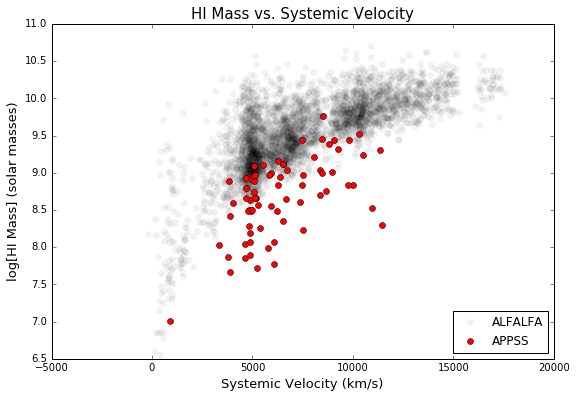

In [95]:
#HI mass vs. systemic velocity
plt.figure()
plt.figure(figsize=(9,6))
plt.plot(v_alf,np.log10(M_HI_alf),'ko', alpha=.05, label = 'ALFALFA')
plt.plot(vsys_appss_det, np.log10(M_HI_appss), 'ro', label = 'APPSS')
plt.title("HI Mass vs. Systemic Velocity",fontsize=15)
plt.xlabel('Systemic Velocity (km/s)',fontsize=13)
plt.ylabel('log[HI Mass] (solar masses)',fontsize=13)
plt.legend(loc = 4, numpoints = 1) #location of legend 

fig = plt.gcf()

#fig.savefig('HI_mass_vsys.pdf')

# Systemic Velocity Frequency Histogram of Slice

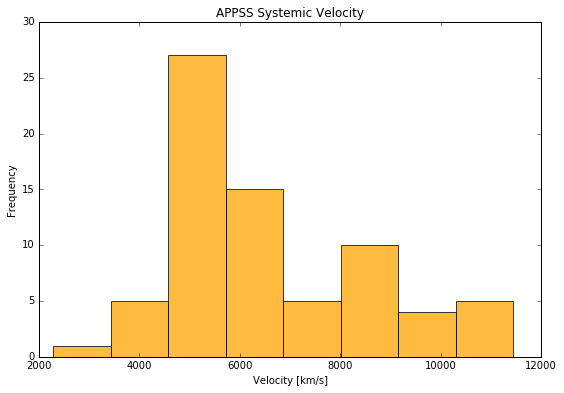

In [68]:
#systemic velocity frequency of just my slice
plt.figure()
plt.figure(figsize=(9,6))
plt.hist(vsys_appss, alpha=.75, facecolor = 'orange', edgecolor= 'black')
plt.title("APPSS Systemic Velocity")
plt.xlabel("Velocity [km/s]")
plt.ylabel("Frequency")
plt.axis([2000, 12000, 0, 30])

fig = plt.gcf()

#fig.savefig('velocity_APPSS.pdf') 

# Systemic Velocity Freqency of ALFALFA Catalog Histogram

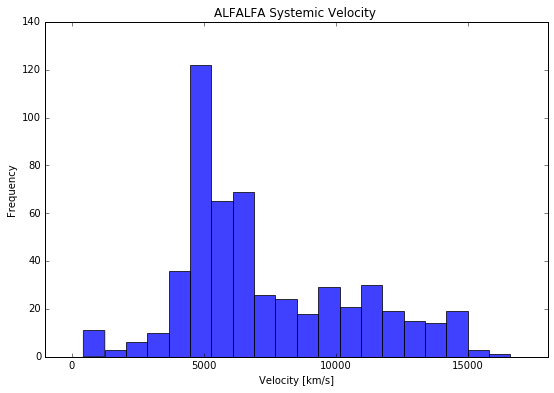

In [69]:
#this histogram is just of the systemic velocity of ALFALFA data in my slice's range
plt.figure()
plt.figure(figsize=(9,6))
plt.hist(v_alf_s35,bins=20, alpha=.75, facecolor = 'blue', edgecolor= 'black') #remember good_v_alf was used to define data from ALFALFA that could fit in my slice
plt.title("ALFALFA Systemic Velocity ")
plt.xlabel("Velocity [km/s]")
plt.ylabel("Frequency")
plt.axis([-1000, 18000, 0, 140])

fig = plt.gcf()

#fig.savefig('velocity_ALF.pdf') #uncomment to save figure

# Comparing Systemic Velocity Frequency of ALFALFA and Slice Data

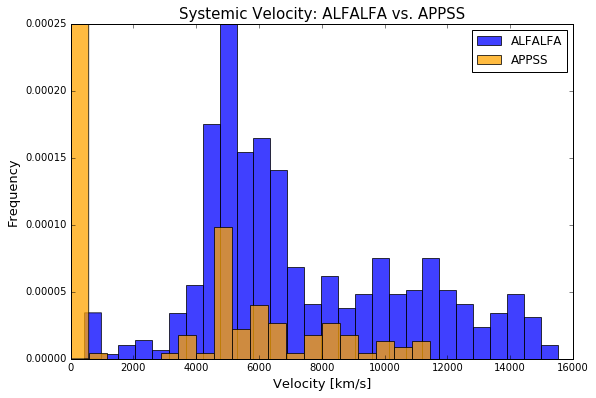

In [70]:
#histogram compares the velocity of my slice data and ALFALFA data in my slice's range
plt.figure()
plt.figure(figsize=(9,6))
plt.hist(v_alf_s35,bins=30,normed=True,alpha=.75,facecolor='blue',edgecolor='black', label = 'ALFALFA') #normalizes for fractional values
plt.hist(vsys_appss,bins=20,normed=True,alpha=.75,facecolor='orange',edgecolor='black', label = 'APPSS')

plt.title("Systemic Velocity: ALFALFA vs. APPSS", fontsize=15)
plt.xlabel("Velocity [km/s]",fontsize=13)
plt.ylabel("Frequency",fontsize=13)
plt.axis([0, 16000, 0, .00025])
plt.legend(loc = 1, numpoints = 1) #location of legend 


fig = plt.gcf()

#fig.savefig('velocity_both_hist.pdf') #uncomment to save 

# Flux Frequency Histogram of Slice

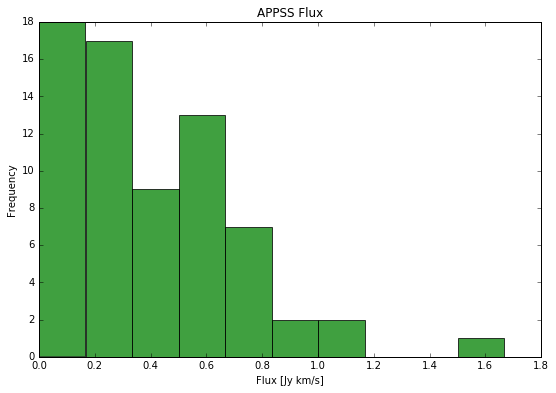

In [71]:
#flux frequency of just my slice 
plt.figure()
plt.figure(figsize=(9,6))
plt.hist(flux_appss, alpha=.75, facecolor = 'green', edgecolor= 'black')
plt.title("APPSS Flux")
plt.xlabel("Flux [Jy km/s]")
plt.ylabel("Frequency")
plt.axis([0.0, 1.8, 0, 18])

fig = plt.gcf()

#fig.savefig('flux_appss.pdf')

# Comparing W50 Frequency of ALFALFA and Slice Data

In [73]:
#this compares the w50 of my slice and ALFALFA, however, I did not limit the amount of ALFALFA displayed 
w50_appss=data_appss['W50']
w50_alf=data_alf['W50']

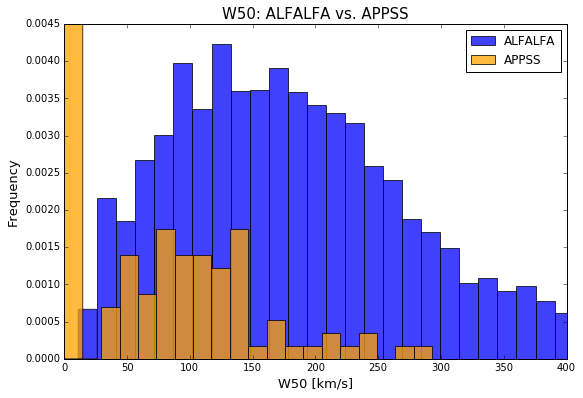

In [74]:
#Histogram compares the frequency of certain W50 values of my slice and ALFALFA
plt.figure()
plt.figure(figsize=(9,6))
plt.hist(w50_alf, bins=50, alpha =.75, normed = True, facecolor='blue',edgecolor='black', label = 'ALFALFA')
plt.hist(w50_appss, bins=20, normed = True, alpha =.75, facecolor='orange',edgecolor='black', label = 'APPSS')
plt.title("W50: ALFALFA vs. APPSS",fontsize= 15)
plt.xlabel("W50 [km/s]", fontsize = 13)
plt.ylabel("Frequency", fontsize = 13)
plt.axis([0, 400, 0, .0045])
plt.legend(loc = 1, numpoints = 1) #location of legend 


fig = plt.gcf()

#fig.savefig('w50_both_hist.pdf')